## CartPole Skating

> **Masalah**: Jika Peter ingin melarikan diri daripada serigala, dia perlu bergerak lebih pantas daripadanya. Kita akan lihat bagaimana Peter boleh belajar meluncur, khususnya untuk mengekalkan keseimbangan, menggunakan Q-Learning.

Pertama, mari pasang gym dan import perpustakaan yang diperlukan:


In [1]:
#code block 1

## Buat persekitaran cartpole


In [ ]:
#code block 2

Untuk melihat bagaimana persekitaran berfungsi, mari jalankan simulasi pendek selama 100 langkah.


In [ ]:
#code block 3

Semasa simulasi, kita perlu mendapatkan pemerhatian untuk menentukan cara bertindak. Malah, fungsi `step` mengembalikan kepada kita pemerhatian semasa, fungsi ganjaran, dan bendera `done` yang menunjukkan sama ada wajar untuk meneruskan simulasi atau tidak:


In [ ]:
#code block 4

Kita boleh mendapatkan nilai min dan maks bagi nombor-nombor tersebut:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Mari kita juga meneroka kaedah diskritisasi lain menggunakan bin:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Mari kita jalankan simulasi pendek dan perhatikan nilai persekitaran diskret tersebut.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Struktur Jadual-Q


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


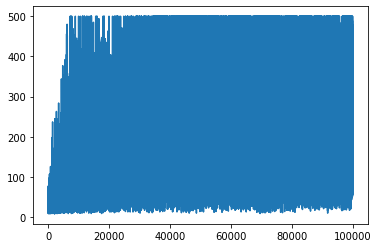

In [20]:
plt.plot(rewards)

Dari graf ini, tidak mungkin untuk memberitahu apa-apa, kerana disebabkan oleh sifat proses latihan stokastik, tempoh sesi latihan berbeza dengan ketara. Untuk memberikan lebih makna kepada graf ini, kita boleh mengira **purata bergerak** ke atas siri eksperimen, katakanlah 100. Ini boleh dilakukan dengan mudah menggunakan `np.convolve`:


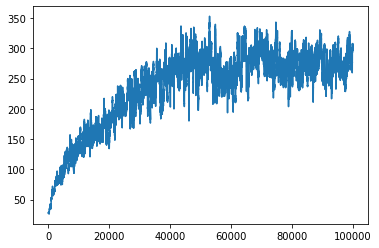

In [22]:
#code block 12

## Memvariasikan Hiperparameter dan Melihat Hasilnya dalam Tindakan

Sekarang, akan menjadi menarik untuk melihat bagaimana model yang telah dilatih berfungsi. Mari kita jalankan simulasi, dan kita akan mengikuti strategi pemilihan tindakan yang sama seperti semasa latihan: pensampelan berdasarkan taburan kebarangkalian dalam Q-Table:


In [23]:
# code block 13

## Menyimpan hasil ke dalam GIF animasi

Jika anda ingin mengagumkan rakan-rakan anda, anda mungkin mahu menghantar gambar GIF animasi tiang keseimbangan kepada mereka. Untuk melakukan ini, kita boleh menggunakan `env.render` untuk menghasilkan bingkai imej, dan kemudian menyimpannya sebagai GIF animasi menggunakan perpustakaan PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan perkhidmatan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Walaupun kami berusaha untuk memastikan ketepatan, sila ambil maklum bahawa terjemahan automatik mungkin mengandungi kesilapan atau ketidaktepatan. Dokumen asal dalam bahasa asalnya harus dianggap sebagai sumber yang berwibawa. Untuk maklumat penting, terjemahan manusia profesional adalah disyorkan. Kami tidak bertanggungjawab atas sebarang salah faham atau salah tafsir yang timbul daripada penggunaan terjemahan ini.
